# Data Understanding

For this project, I scraped data from billboard.com and genius.com 
Billboard offered the Top 100 songs for each year from 1970-2020. 
Genius offered the lyrics for each song. 
We look specifically at whether songs 

### Download and Preview Data

In [1]:
# download DataFrame
import pandas as pd
df = pd.read_csv('/Users/christianmoya/Documents/Flatiron/Phase_4/billboards.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,year,rank,song,artist,lyrics
0,1970,0,Bridge Over Troubled Water,Simon & Garfunkel,"Sorry, we didn't mean for that to happen!"
1,1970,1,(They Long To Be) Close To You,Carpenters,[Verse 1] Why do birds suddenly appear Every t...
2,1970,2,American Woman/No Sugar Tonight,The Guess Who,"Sorry, we didn't mean for that to happen!"
3,1970,3,Raindrops Keep Fallin' On My Head,B.J. Thomas,Raindrops keep fallin' on my head And just lik...
4,1970,4,War,Edwin Starr,"[Intro] (War, huh) Yeah! (What is it good for?..."


In [2]:
df['lyrics'].value_counts()

     Sorry, we didn't mean for that to happen!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

# Data Preparation

### Cleaning Data

Looking at the value counts for the lyrics column, we find that "Sorry, we didn't mean for that to happen!" occurs over 1,500 times. This could be due to that the url for the song was incorrect or that Genius.com did not have the data. 

We also see that some lyrics are repeated 15 times in the DataFrame. At times when billboards did not have the data for that exact year, they showcase the Top 100 for the closest year available.

In [3]:
# remove rows with "Sorry, we didn't mean for that to happen!"
df.drop(df.index[(df['lyrics'] == "     Sorry, we didn't mean for that to happen!   ")], axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3051 entries, 1 to 4551
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    3051 non-null   int64 
 1   rank    3051 non-null   int64 
 2   song    3051 non-null   object
 3   artist  3051 non-null   object
 4   lyrics  3051 non-null   object
dtypes: int64(2), object(3)
memory usage: 143.0+ KB


In [4]:
# remove duplicates
df.drop_duplicates(subset=['lyrics'], keep='first', inplace=True, ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    2224 non-null   int64 
 1   rank    2224 non-null   int64 
 2   song    2224 non-null   object
 3   artist  2224 non-null   object
 4   lyrics  2224 non-null   object
dtypes: int64(2), object(3)
memory usage: 87.0+ KB


### Cleaning Text Data (Lyrics)

Though artists are very intentional with the words they choose, they do include many words that don't add much to the songs, such as "the" or "me", because of this, we'll need to get rid of those common words, also known as <b>"stop words"</b>. We'll need to remove punctuation marks as well.

In [5]:
# import nlp packages
import re 
from collections import defaultdict
import nltk 
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# create list of stop words, punctuation, and remove words that organized site (verse, intro, chorus)
stopwords_list = stopwords.words('english') + list(string.punctuation)
stopwords_list += ["''", '""', '...', '``']
stopwords_list += ['intro','yeah', 'oh', 'chorus', 'verse', 'uh', 'ooh', 'na', '1', '2', '3']

# create function that removes punctuation and stop words
def process_text(text):
    text = str(text)
    cleaned = re.sub('\W+', ' ', text)
    tokens = nltk.word_tokenize(cleaned)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    return stopwords_removed

# create new column with processed text 
df['processed_lyrics'] = df['lyrics'].apply(process_text)
df.head()

,year,rank,song,artist,lyrics,processed_lyrics
0,1970,1,(They Long To Be) Close To You,Carpenters,[Verse 1] Why do birds suddenly appear Every t...,"[birds, suddenly, appear, every, time, near, l..."
1,1970,3,Raindrops Keep Fallin' On My Head,B.J. Thomas,Raindrops keep fallin' on my head And just lik...,"[raindrops, keep, fallin, head, like, guy, who..."
2,1970,4,War,Edwin Starr,"[Intro] (War, huh) Yeah! (What is it good for?...","[war, huh, good, absolutely, nothing, uhuh, wa..."
3,1970,5,Ain't No Mountain High Enough,Diana Ross,"[Verse 1:] If you need me, call me No matter w...","[need, call, matter, matter, far, call, name, ..."
4,1970,6,I'll Be There,Jackson 5,"[Verse 1] You and I must make a pact, we must ...","[must, make, pact, must, bring, salvation, bac..."


### Word Frequency

Now that we have all the words cleaned up, let's take a look at which words are sang the most. 

In [7]:
# create function that looks at the frequency of words
total_vocab = set()
for song in df['processed_lyrics']:
    total_vocab.update(song)
    
len(total_vocab)

13545

In [8]:
articles_concat = []
for article in df['processed_lyrics']:
    articles_concat += article
    
articles_freqdist = FreqDist(articles_concat)
articles_freqdist.most_common(25)

[('love', 7618),
 ('know', 5197),
 ('got', 4579),
 ('like', 4511),
 ('baby', 4125),
 ('get', 3163),
 ('let', 3092),
 ('go', 3062),
 ('time', 2783),
 ('want', 2571),
 ('one', 2569),
 ('say', 2539),
 ('take', 2453),
 ('gon', 2427),
 ('never', 2379),
 ('cause', 2362),
 ('make', 2266),
 ('wan', 2151),
 ('come', 2142),
 ('see', 2078),
 ('night', 2022),
 ('way', 1995),
 ('right', 1961),
 ('girl', 1960),
 ('la', 1874)]

In [14]:
word_count = pd.DataFrame(articles_freqdist.most_common(10))
word_count

,0,1
0,love,7618
1,know,5197
2,got,4579
3,like,4511
4,baby,4125
5,get,3163
6,let,3092
7,go,3062
8,time,2783
9,want,2571


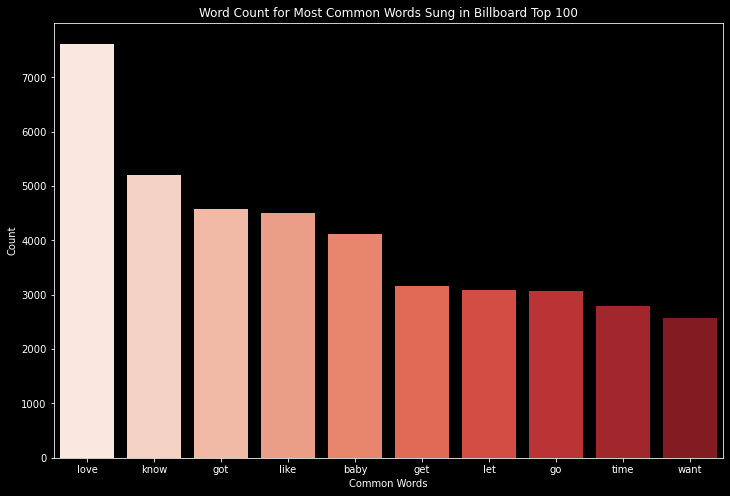

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=[12,8])
plt.style.use('dark_background')
sns.barplot(x=0, y=1, data=word_count, palette='Reds')
plt.xlabel('Common Words')
plt.ylabel('Count')
plt.title('Word Count for Most Common Words Sung in Billboard Top 100');

### Visualizing Word Vectors with t-SNE

In [16]:
tokens = list(df['processed_lyrics'])

In [88]:
# import libraries
import numpy as np 
from gensim.models import word2vec
from sklearn.manifold import TSNE

model = word2vec.Word2Vec(tokens, vector_size=100, window=20, min_count=750, workers=4)

In [18]:
model.wv.get_vector('love', norm=True)

array([ 1.11769713e-01,  6.21040091e-02,  2.23409738e-02,  1.58163145e-01,
       -1.65566698e-01, -2.02683322e-02,  2.63672352e-01,  3.95896286e-02,
       -1.31175041e-01,  4.72154506e-02,  7.99335539e-02,  2.06677914e-01,
       -9.51016322e-02, -7.01047555e-02, -1.61941610e-02, -2.86557265e-02,
        5.30682690e-02,  7.29266703e-02, -1.67211190e-01,  6.16250075e-02,
        2.11029258e-02,  1.21028244e-01,  8.06651786e-02,  1.74853250e-01,
       -7.35251531e-02, -6.44944236e-02, -9.75061860e-03,  5.24090976e-02,
       -1.57198340e-01, -1.98484100e-02, -4.95028347e-02, -8.12402144e-02,
        6.17467314e-02, -6.14056252e-02, -5.70948888e-03, -8.07915851e-02,
        1.29902303e-01, -6.53317273e-02,  5.84968291e-02,  4.36573243e-03,
       -9.38877463e-02, -2.85644718e-02, -2.24751253e-02,  6.00447170e-02,
        1.01427495e-01,  6.23023435e-02, -8.53738934e-02,  1.78584799e-01,
        1.70018345e-01, -1.67816803e-02, -1.36264503e-01,  8.00355524e-02,
        4.80355956e-02, -

In [89]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.key_to_index:
        tokens.append(model.wv.get_vector(word, norm=True))
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(24,16))
    plt.style.use('dark_background')
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     fontsize=20)
    plt.show()

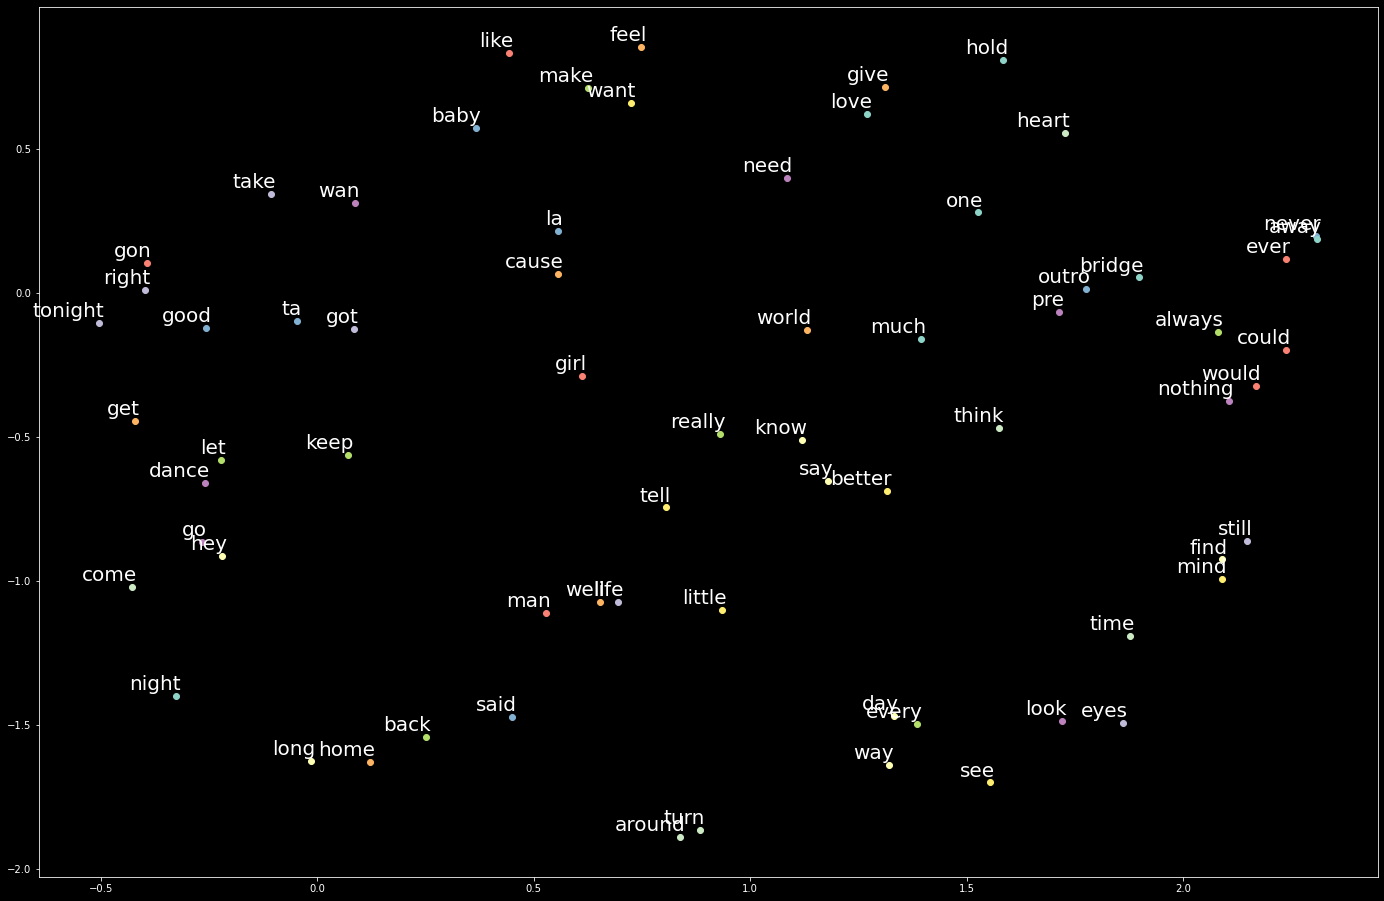

In [90]:
tsne_plot(model)

### Topic Modeling

In [21]:
# join tokens together for vectorizers
def join_text(text): 
    joined_text = ' '.join(text)
    return joined_text

df['lyrics_modeling'] = df['processed_lyrics'].map(join_text)
df.head()

,year,rank,song,artist,lyrics,processed_lyrics,lyrics_modeling
0,1970,1,(They Long To Be) Close To You,Carpenters,[Verse 1] Why do birds suddenly appear Every t...,"[birds, suddenly, appear, every, time, near, l...",birds suddenly appear every time near like lon...
1,1970,3,Raindrops Keep Fallin' On My Head,B.J. Thomas,Raindrops keep fallin' on my head And just lik...,"[raindrops, keep, fallin, head, like, guy, who...",raindrops keep fallin head like guy whose feet...
2,1970,4,War,Edwin Starr,"[Intro] (War, huh) Yeah! (What is it good for?...","[war, huh, good, absolutely, nothing, uhuh, wa...",war huh good absolutely nothing uhuh war huh g...
3,1970,5,Ain't No Mountain High Enough,Diana Ross,"[Verse 1:] If you need me, call me No matter w...","[need, call, matter, matter, far, call, name, ...",need call matter matter far call name hurry de...
4,1970,6,I'll Be There,Jackson 5,"[Verse 1] You and I must make a pact, we must ...","[must, make, pact, must, bring, salvation, bac...",must make pact must bring salvation back love ...


In [22]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# create bag of words model 
bag_of_words_creator = CountVectorizer()
bag_of_words = bag_of_words_creator.fit_transform(df['lyrics_modeling'])

tfidf_creator = TfidfVectorizer(min_df = 0.2)
tfidf = tfidf_creator.fit_transform(df['lyrics_modeling'])

lda_bag_of_words_creator = LatentDirichletAllocation(n_components=10)
lda_bag_of_words_creator.fit_transform(bag_of_words)

lda_tfidf_creator = LatentDirichletAllocation(n_components=10)
lda_tfidf = lda_tfidf_creator.fit_transform(tfidf)

print("Topics found by bag of words LDA")
for topic_id, topic in enumerate(lda_bag_of_words_creator.components_):
  message = "Topic #{}: ".format(topic_id + 1)
  message += " ".join([bag_of_words_creator.get_feature_names()[i] for i in topic.argsort()[:-5 :-1]])
  print(message)

print("\n\nTopics found by tf-idf LDA")
for topic_id, topic in enumerate(lda_tfidf_creator.components_):
  message = "Topic #{}: ".format(topic_id + 1)
  message += " ".join([tfidf_creator.get_feature_names()[i] for i in topic.argsort()[:-5 :-1]])
  print(message)

Topics found by bag of words LDA
Topic #1: baby love take whoa
Topic #2: know back gon go
Topic #3: night way eyes like
Topic #4: got want like bad
Topic #5: la good like got
Topic #6: get dance tonight let
Topic #7: like got hey go
Topic #8: love know time got
Topic #9: like little ya let
Topic #10: let doo baby go


Topics found by tf-idf LDA
Topic #1: gon come baby take
Topic #2: love heart baby know
Topic #3: keep got eyes like
Topic #4: need want say one
Topic #5: like night think feel
Topic #6: away day take say
Topic #7: go back life time
Topic #8: wan get got give
Topic #9: baby girl good love
Topic #10: never could let know


# Building the Model


### Engineering the Target

We've seen the common words and topics for the 2,000 songs. Now, we'll be looking at what differentiates the Top 25 from the rest of the pact using lyrics alone. For this project, we'll be looking at the Top 25 songs of the 100. What makes those songs hit different than the rest of them. Let's find out, but first, let's label whether the song is a Top 25 hit or not. 

In [23]:
# create new column that checks if rank is less than 25 or not (0-24)
df['top_25'] = df['rank'] < 25
df.head()

,year,rank,song,artist,lyrics,processed_lyrics,lyrics_modeling,top_25
0,1970,1,(They Long To Be) Close To You,Carpenters,[Verse 1] Why do birds suddenly appear Every t...,"[birds, suddenly, appear, every, time, near, l...",birds suddenly appear every time near like lon...,True
1,1970,3,Raindrops Keep Fallin' On My Head,B.J. Thomas,Raindrops keep fallin' on my head And just lik...,"[raindrops, keep, fallin, head, like, guy, who...",raindrops keep fallin head like guy whose feet...,True
2,1970,4,War,Edwin Starr,"[Intro] (War, huh) Yeah! (What is it good for?...","[war, huh, good, absolutely, nothing, uhuh, wa...",war huh good absolutely nothing uhuh war huh g...,True
3,1970,5,Ain't No Mountain High Enough,Diana Ross,"[Verse 1:] If you need me, call me No matter w...","[need, call, matter, matter, far, call, name, ...",need call matter matter far call name hurry de...,True
4,1970,6,I'll Be There,Jackson 5,"[Verse 1] You and I must make a pact, we must ...","[must, make, pact, must, bring, salvation, bac...",must make pact must bring salvation back love ...,True


In [24]:
from sklearn.model_selection import train_test_split
target = df['top_25']
data = df['lyrics_modeling']
data_train, data_test, target_train, target_test = train_test_split(data, target)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_train = vectorizer.fit_transform(data_train)
tfidf_test = vectorizer.transform(data_test)

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

def build_model(tfidf_train, tfidf_test, target_train, target_test):
    
    # fit model 
    classifiers = [MultinomialNB(), RandomForestClassifier(n_estimators=100)]
    for cls in classifiers:
        cls.fit(tfidf_train, target_train)
    
    # print out confusion matrix 
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    for cls, ax in zip(classifiers, axes):
        plot_confusion_matrix(cls, tfidf_test, target_test, ax=ax, cmap='Reds')
        ax.title.set_text(type(cls).__name__)
    plt.tight_layout()
    plt.show()
    
    # naive bayes classifier 
    nb_classifier = MultinomialNB()
    nb_classifier.fit(tfidf_train, target_train)
    nb_train_preds = nb_classifier.predict(tfidf_train)
    nb_test_preds = nb_classifier.predict(tfidf_test)

    print('Naive Bayes Scores')
    print('Training Score:' ,accuracy_score(target_train, nb_train_preds))
    print('Testing Score: ', accuracy_score(target_test, nb_test_preds))
    
    # random forest classifier 
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(tfidf_train, target_train)

    rf_train_preds = rf_classifier.predict(tfidf_train)
    rf_test_preds = rf_classifier.predict(tfidf_test)
    
    print('\n')
    print('Random Forest Scores:')
    print('Training Score: ', accuracy_score(target_train, rf_train_preds))
    print('Testing Score: ', accuracy_score(target_test, rf_test_preds))

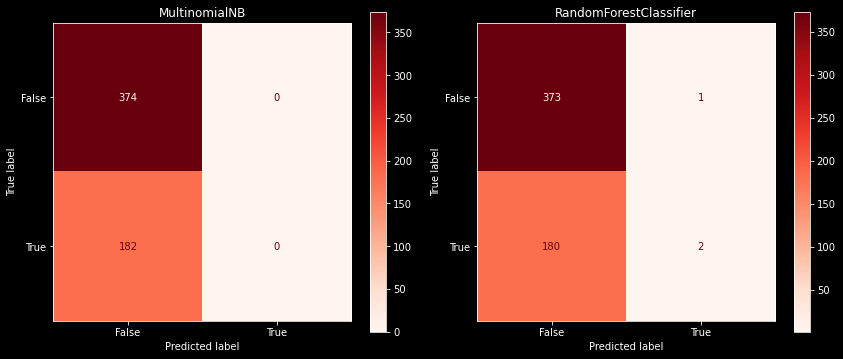

Naive Bayes Scores
Training Score: 0.7290167865707434
Testing Score:  0.6726618705035972


Random Forest Scores:
Training Score:  0.999400479616307
Testing Score:  0.6726618705035972


In [36]:
build_model(tfidf_train, tfidf_test, target_train, target_test)

# Evaluation 

The models did not perform well, especially considering that the imbalance of Trues. If we were to say that all the songs receive a "false", then our prediction would be correct 75% of the time anyways, which is essentially what happened. Perhaps this is a sign that shows the words alone don't signify whether a song is a hit or not. 

Moving forward, we could probably try dealing with imbalance using SMOTE.

### Dealing with Imbalance Using SMOTE

In [37]:
# Address imbalance using SMOTE 
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
data_train_resampled, target_train_resampled = smote.fit_sample(tfidf_train, target_train)

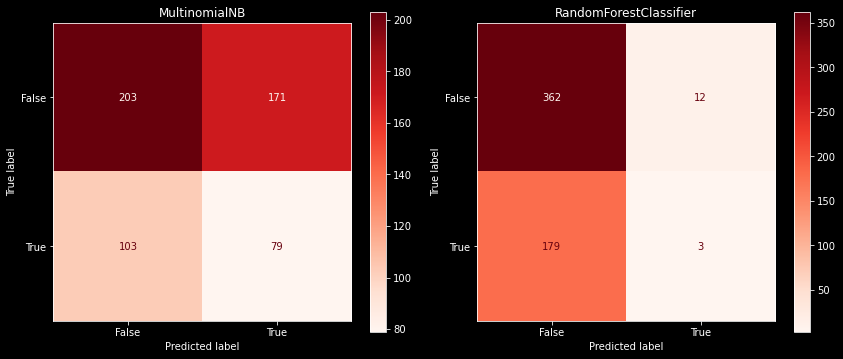

Naive Bayes Scores
Training Score: 0.9002473206924979
Testing Score:  0.5071942446043165


Random Forest Scores:
Training Score:  0.9995877988458368
Testing Score:  0.6474820143884892


In [38]:
build_model(data_train_resampled, tfidf_test, target_train_resampled, target_test)

When using SMOTE, we get a big problem with overfitting. 

### Stemming

In [39]:
# stemming 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stem_text(text_list):
    stemmed = [stemmer.stem(token) for token in text_list]
    joined_text = join_text(stemmed)
    return joined_text

df['stemmed_lyrics'] = df['processed_lyrics'].map(stem_text)
df.head()

,year,rank,song,artist,lyrics,processed_lyrics,lyrics_modeling,top_25,stemmed_lyrics
0,1970,1,(They Long To Be) Close To You,Carpenters,[Verse 1] Why do birds suddenly appear Every t...,"[birds, suddenly, appear, every, time, near, l...",birds suddenly appear every time near like lon...,True,bird suddenli appear everi time near like long...
1,1970,3,Raindrops Keep Fallin' On My Head,B.J. Thomas,Raindrops keep fallin' on my head And just lik...,"[raindrops, keep, fallin, head, like, guy, who...",raindrops keep fallin head like guy whose feet...,True,raindrop keep fallin head like guy whose feet ...
2,1970,4,War,Edwin Starr,"[Intro] (War, huh) Yeah! (What is it good for?...","[war, huh, good, absolutely, nothing, uhuh, wa...",war huh good absolutely nothing uhuh war huh g...,True,war huh good absolut noth uhuh war huh good ab...
3,1970,5,Ain't No Mountain High Enough,Diana Ross,"[Verse 1:] If you need me, call me No matter w...","[need, call, matter, matter, far, call, name, ...",need call matter matter far call name hurry de...,True,need call matter matter far call name hurri de...
4,1970,6,I'll Be There,Jackson 5,"[Verse 1] You and I must make a pact, we must ...","[must, make, pact, must, bring, salvation, bac...",must make pact must bring salvation back love ...,True,must make pact must bring salvat back love rea...


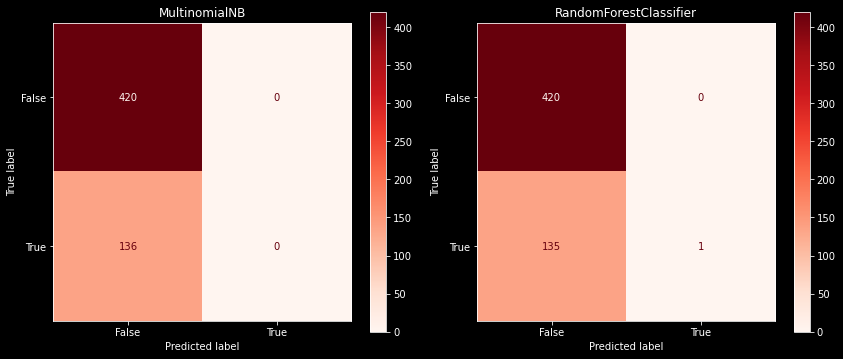

Naive Bayes Scores
Training Score: 0.7014388489208633
Testing Score:  0.7553956834532374


Random Forest Scores:
Training Score:  0.999400479616307
Testing Score:  0.7553956834532374


In [42]:
data = df['stemmed_lyrics']
target = df['top_25']

data_train, data_test, target_train, target_test = train_test_split(data, target)
tfidf_train = vectorizer.fit_transform(data_train)
tfidf_test = vectorizer.transform(data_test)

build_model(tfidf_train, tfidf_test, target_train, target_test)

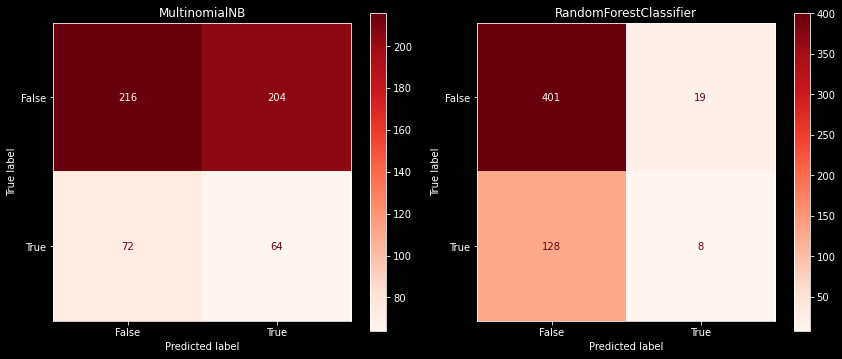

Naive Bayes Scores
Training Score: 0.8911739502999143
Testing Score:  0.5035971223021583


Random Forest Scores:
Training Score:  0.9995715509854327
Testing Score:  0.7517985611510791


In [43]:
# stemmed data with SMOTE 
data_train_resampled, target_train_resampled = smote.fit_sample(tfidf_train, target_train)
build_model(data_train_resampled, tfidf_test, target_train_resampled, target_test)

### Lemmatizing 

In [44]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lem_text(text_list):
    lemmatized = [lemmatizer.lemmatize(token) for token in text_list]
    joined_text = join_text(lemmatized)
    return joined_text

df['lemmatized_lyrics'] = df['processed_lyrics'].map(lem_text)
df.head()

,year,rank,song,artist,lyrics,processed_lyrics,lyrics_modeling,top_25,stemmed_lyrics,lemmatized_lyrics
0,1970,1,(They Long To Be) Close To You,Carpenters,[Verse 1] Why do birds suddenly appear Every t...,"[birds, suddenly, appear, every, time, near, l...",birds suddenly appear every time near like lon...,True,bird suddenli appear everi time near like long...,bird suddenly appear every time near like long...
1,1970,3,Raindrops Keep Fallin' On My Head,B.J. Thomas,Raindrops keep fallin' on my head And just lik...,"[raindrops, keep, fallin, head, like, guy, who...",raindrops keep fallin head like guy whose feet...,True,raindrop keep fallin head like guy whose feet ...,raindrop keep fallin head like guy whose foot ...
2,1970,4,War,Edwin Starr,"[Intro] (War, huh) Yeah! (What is it good for?...","[war, huh, good, absolutely, nothing, uhuh, wa...",war huh good absolutely nothing uhuh war huh g...,True,war huh good absolut noth uhuh war huh good ab...,war huh good absolutely nothing uhuh war huh g...
3,1970,5,Ain't No Mountain High Enough,Diana Ross,"[Verse 1:] If you need me, call me No matter w...","[need, call, matter, matter, far, call, name, ...",need call matter matter far call name hurry de...,True,need call matter matter far call name hurri de...,need call matter matter far call name hurry de...
4,1970,6,I'll Be There,Jackson 5,"[Verse 1] You and I must make a pact, we must ...","[must, make, pact, must, bring, salvation, bac...",must make pact must bring salvation back love ...,True,must make pact must bring salvat back love rea...,must make pact must bring salvation back love ...


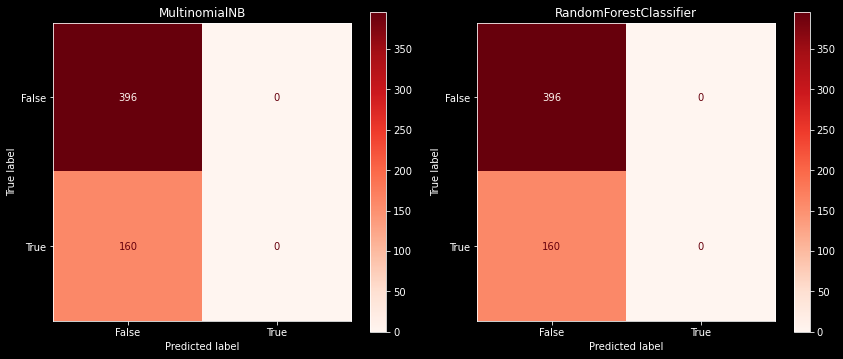

Naive Bayes Scores
Training Score: 0.7164268585131894
Testing Score:  0.7122302158273381


Random Forest Scores:
Training Score:  0.999400479616307
Testing Score:  0.7122302158273381


In [45]:
data = df['lemmatized_lyrics']
target = df['top_25']

data_train, data_test, target_train, target_test = train_test_split(data, target)
tfidf_train = vectorizer.fit_transform(data_train)
tfidf_test = vectorizer.transform(data_test)

build_model(tfidf_train, tfidf_test, target_train, target_test)

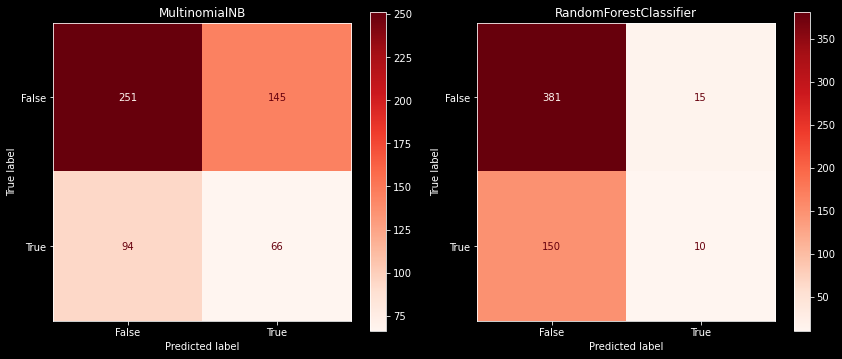

Naive Bayes Scores
Training Score: 0.9219143576826196
Testing Score:  0.5701438848920863


Random Forest Scores:
Training Score:  0.9995801847187238
Testing Score:  0.7086330935251799


In [46]:
# lemmatized data with SMOTE 
data_train_resampled, target_train_resampled = smote.fit_sample(tfidf_train, target_train)
build_model(data_train_resampled, tfidf_test, target_train_resampled, target_test)

### Graph Results

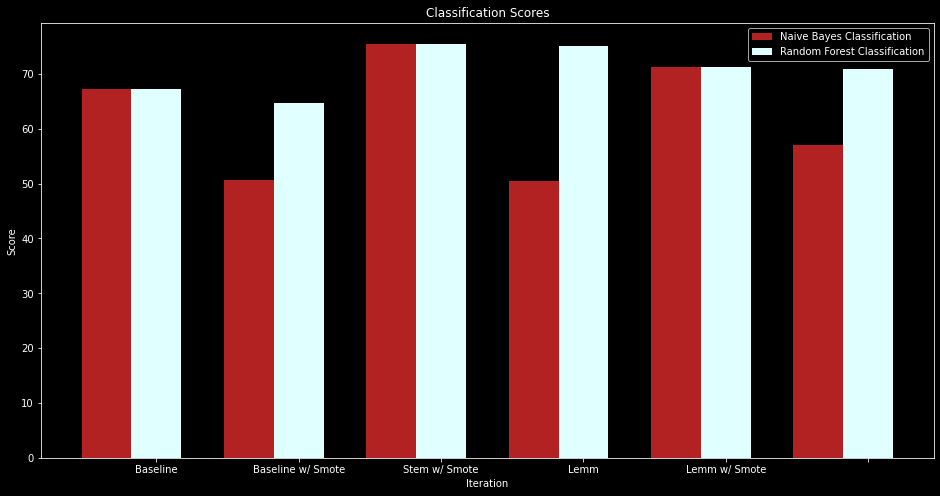

In [87]:
nb_results = [67.266, 50.719, 75.539, 50.539, 71.223, 57.014]
rf_results = [67.266, 64.749, 75.539, 75.179, 71.223, 70.863]

ind = np.arange(len(nb_results))
width = 0.35


plt.figure(figsize=(16,8))
plt.bar(ind-width/2, nb_results, width, label='Naive Bayes Classification', color='firebrick')
plt.bar(ind+width/2, rf_results, width, label='Random Forest Classification', color='lightcyan')

plt.ylabel('Score')
plt.xlabel('Iteration')
plt.title('Classification Scores')
plt.xticks(ind)
plt.xticks(ind + width / 2, (('Baseline', 'Baseline w/ Smote', 'Stem w/ Smote', 'Lemm', 'Lemm w/ Smote')))
plt.legend();

# Top 25 vs Not

In [47]:
top_25_df = df[df['top_25']==True]
top_25_articles_concat = []
for article in top_25_df['processed_lyrics']:
    top_25_articles_concat += article
    
top_25_articles_freqdist = FreqDist(top_25_articles_concat)
top_25_articles_freqdist.most_common(25)

[('love', 2233),
 ('like', 1415),
 ('know', 1387),
 ('got', 1349),
 ('baby', 1216),
 ('let', 1076),
 ('get', 879),
 ('go', 848),
 ('gon', 806),
 ('never', 770),
 ('cause', 763),
 ('come', 749),
 ('want', 745),
 ('la', 686),
 ('take', 668),
 ('one', 645),
 ('time', 641),
 ('say', 633),
 ('feel', 623),
 ('make', 622),
 ('way', 613),
 ('night', 603),
 ('see', 599),
 ('wan', 556),
 ('right', 532)]

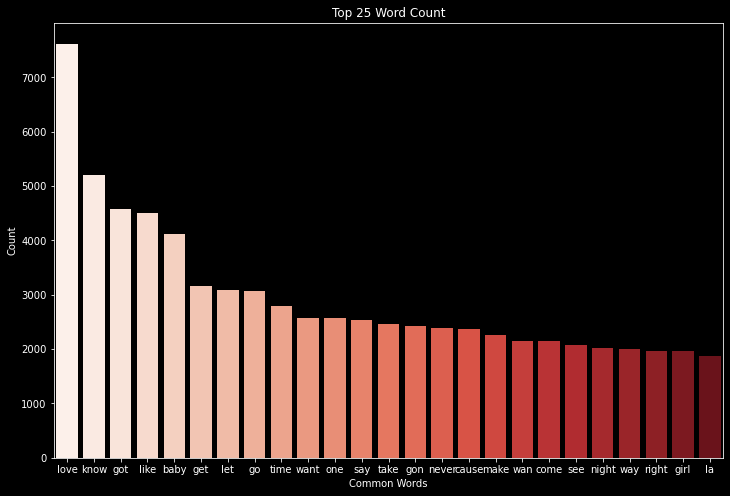

In [48]:
top_25_word_count = pd.DataFrame(articles_freqdist.most_common(25))
plt.figure(figsize=[12,8])
plt.style.use('dark_background')
sns.barplot(x=0, y=1, data=top_25_word_count, palette='Reds')
plt.xlabel('Common Words')
plt.ylabel('Count')
plt.title('Top 25 Word Count');

In [49]:
not_top_25_df = df[df['top_25']==False]
not_top_25_concat = []
for article in not_top_25_df['processed_lyrics']:
    not_top_25_concat += article
    
non_top_articles_freqdist = FreqDist(not_top_25_concat)
non_top_articles_freqdist.most_common(25)

[('love', 5385),
 ('know', 3810),
 ('got', 3230),
 ('like', 3096),
 ('baby', 2909),
 ('get', 2284),
 ('go', 2214),
 ('time', 2142),
 ('let', 2016),
 ('one', 1924),
 ('say', 1906),
 ('want', 1826),
 ('take', 1785),
 ('make', 1644),
 ('gon', 1621),
 ('never', 1609),
 ('cause', 1599),
 ('wan', 1595),
 ('girl', 1529),
 ('see', 1479),
 ('right', 1429),
 ('night', 1419),
 ('come', 1393),
 ('way', 1382),
 ('back', 1346)]

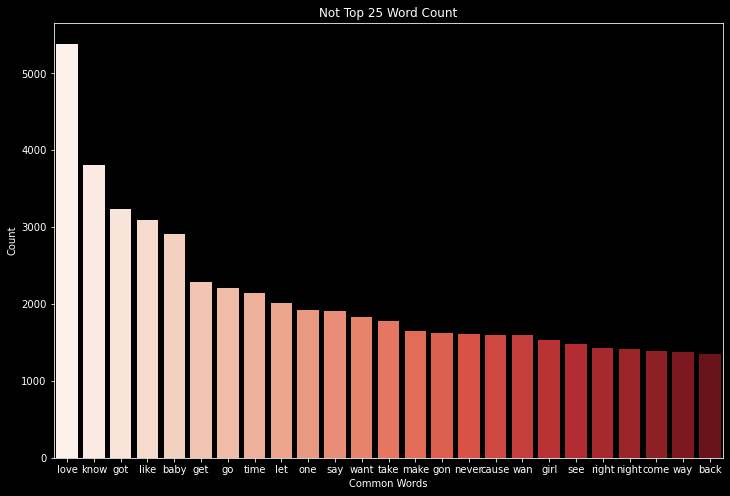

In [50]:
non_top_25_word_count = pd.DataFrame(non_top_articles_freqdist.most_common(25))
plt.figure(figsize=[12,8])
plt.style.use('dark_background')
sns.barplot(x=0, y=1, data=non_top_25_word_count, palette='Reds')
plt.xlabel('Common Words')
plt.ylabel('Count')
plt.title('Not Top 25 Word Count');

# Extra ish I will explore later

In [51]:
artist_count = df['artist'].value_counts()
artist_count[:25]

Madonna                19
Elton John             18
Taylor Swift           18
Drake                  16
Rihanna                15
Bee Gees               12
Michael Jackson        12
Stevie Wonder          12
Katy Perry             11
Lionel Richie          11
Chicago                10
Fleetwood Mac          10
Maroon 5               10
Chris Brown            10
Carpenters             10
Billy Joel             10
Diana Ross             10
Phil Collins           10
Janet Jackson          10
The Black Eyed Peas     9
Beyonce                 9
Foreigner               9
Duran Duran             9
Lady Gaga               9
Donna Summer            9
Name: artist, dtype: int64

Another thing to note too though is if we think about songs like Beyonce's "Me, myself and I" (all of which are stop words), stop words do carry a lot of meaning. For this reason, we'll explore word frequency with and without the stop words. 